# Lab02: Gradient Descent.

- Student ID: 18127266
- Student name: Trần Quỳnh Như

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle (**recommended compression format: zip**).

**Contents:**
- Gradient descent.

**Notes that**: this lab is prepared based on the book "Deep Learning for Computer Vision with Python" by Adrian Rosebrock.

## 1. Loss landscape
![Loss lanscape](img.png) <center>**Figure 1. Loss landscape visualized as a 2D plot. Source: codecamp.vn**<center>

&nbsp;&nbsp;&nbsp;&nbsp; The gradient descent method is an iterative optimization algorithm that operates over a loss landscape (also called an optimization surface).As we can see, our loss landscape has many peaks and valleys based on which values our parameters take on. Each peak is a local maximum that represents very high regions of loss – the local maximum with the largest loss across the entire loss landscape is the global maximum. Similarly, we also have local minimum which represents many small regions of loss. The local minimum with the smallest loss across the loss landscape is our global minimum. In an ideal world, we would like to find this global minimum, ensuring our parameters take on the most optimal possible values.
 
&nbsp;&nbsp;&nbsp;&nbsp;Each position along the surface of the corresponds to a particular loss value given a set of
parameters $\mathbf{W}$ (weight matrix) and $\mathbf{b}$ (bias vector). Our goal is to try different values of $\mathbf{W}$ and $\mathbf{b}$, evaluate their loss, and then take a step towards more optimal values that (ideally) have lower loss.

## 2. The “Gradient” in Gradient Descent

&nbsp;&nbsp;&nbsp;&nbsp;We can use $\mathbf{W}$ and $\mathbf{b}$ and to compute a loss function $L$ or we are able to find our relative position on the loss landscape, but **which direction** we should take a step to move closer to the minimum.

- All We need to do is follow the slope of the gradient $\nabla_{\mathbf{W}}$. We can compute the gradient $\nabla_{\mathbf{W}}$ across all dimensions using the following equation:
$$\dfrac{df\left(x\right)}{dx}=\lim_{h\to0} \dfrac{f\left(x+h\right)-f\left(x\right)}{h}$$
- But, this equation has 2 problems:
    + 1. It’s an *approximation* to the gradient.
    + 2. It’s painfully slow.
    
&nbsp;&nbsp;&nbsp;&nbsp; In practice, we use the **analytic gradient** instead.

## 3. Implementation

### 3.1. Import library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### 3.2. Create data

In [2]:
# generate a 2-class classification problem with 2,000 data points, each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=2000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

'''insert a column of 1’s as the last entry in the feature matrix  
--> treat the bias as a trainable parameter'''
X = np.c_[X, np.ones((X.shape[0]))]

# Split data, use 50% of the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

### 3.3. Training
#### Sigmoid function and derivative of the sigmoid function

In [3]:
def sigmoid_activation(x):
    
    """compute the sigmoid activation value for a given input"""
    #TODO
    return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    #TODO
    g = sigmoid_activation(x)
    return g * (1 - g)


#### Compute output

In [4]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    #TODO
    z = X.dot(W)
    return sigmoid_activation(z)

def predict(W, X):
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #TODO
    #preds=?
    preds = compute_h(W, X)
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

#### Initialize our weight matrix and list of losses

In [5]:
W = np.random.randn(X.shape[1], 1)
losses = []

#### Compute gradient

In [6]:
def compute_gradient(error, h, trainX):
    #TODO 
    """
    The gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of our predictions
    """
    gradient = trainX.T.dot(error)
    return gradient

#### Training function 

In [7]:
def train(W,trainX, trainY, learning_rate, num_epochs):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,trainX)
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = h - trainY
        loss = np.sum(error ** 2)
        losses.append(loss)
        gradient=compute_gradient(error, h, trainX)
        W += -learning_rate * gradient
        
        if epoch == 0 or (epoch + 1) % 5 == 0:
            print("Epoch={}, loss={:.7f}".format(int(epoch + 1),loss))
        
    return W

#### Train our model


In [8]:
num_epochs=100
learning_rate=0.01
W=train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=546.1050186
Epoch=5, loss=45.5048110
Epoch=10, loss=25.5972541
Epoch=15, loss=18.9703254
Epoch=20, loss=14.7815599
Epoch=25, loss=11.6579933
Epoch=30, loss=9.7591886
Epoch=35, loss=7.2842656
Epoch=40, loss=5.6367360
Epoch=45, loss=4.4719486
Epoch=50, loss=3.4848404
Epoch=55, loss=3.3753417
Epoch=60, loss=3.3036598
Epoch=65, loss=3.2346556
Epoch=70, loss=3.1265637
Epoch=75, loss=2.6011691
Epoch=80, loss=2.0770673
Epoch=85, loss=1.9524865
Epoch=90, loss=1.8494367
Epoch=95, loss=1.7241586
Epoch=100, loss=1.5793497


#### Evaluate result

In [9]:
preds = predict(W, testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



**TODO: Study about accuracy, recall, precision, f1-score.**
- Accuracy: The accuracy of a classifier on a given test set is the percentage of test set tuples that
are correctly classified by the classifier.

$$\frac{TP + TN}{T + N}$$

- Recall: it is the same as Sensitivity and is a measure of completeness (what percentage of positive tuples are labeled as such).

$$\frac{TP}{P}$$

- Precision: is a measure of exactness (what percentage of tuples labeled as
positive are actually such).

$$\frac{TP}{TP + FP}$$

- F1: The traditional F-measure or balanced F-score (F1 score) is the harmonic mean of precision and recall.

$$\frac{2 × precision × recall}{precision+recall}$$

**Reference:**

- Accuracy, Recall and Precision: *Chapter 8 - Data Mining Concepts and Techniques 3rd Edition*

- F1: *F-score Wikipedia https://en.wikipedia.org/wiki/F-score*

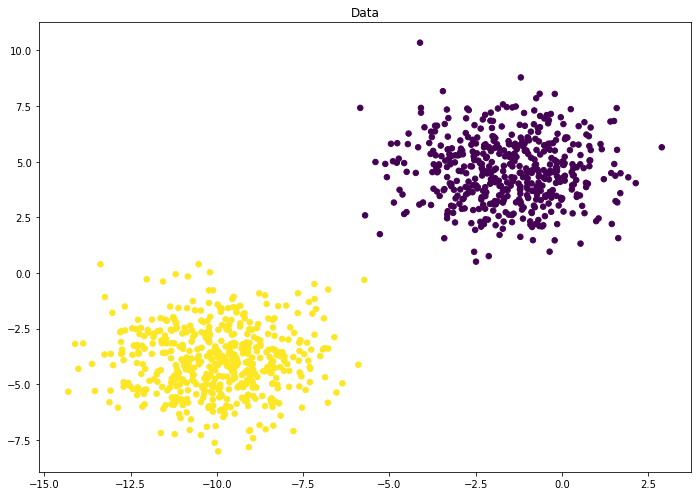

In [10]:
plt.figure(figsize=(11.7,8.27))
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

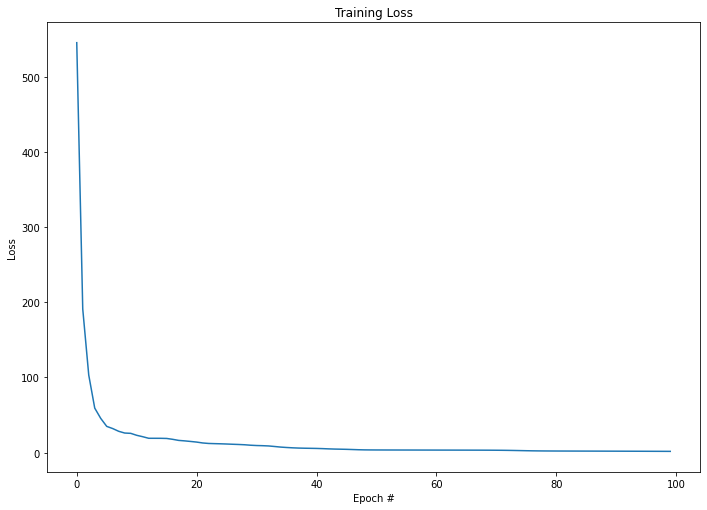

In [11]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

**TODO: Try out different learning rates. Give me your observations**

1. Learning rate = 0.02

Train our model

In [12]:
learning_rate=0.02
losses = []
W=train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=1.5492919
Epoch=5, loss=1.3216938
Epoch=10, loss=1.1339609
Epoch=15, loss=1.0522272
Epoch=20, loss=1.0226231
Epoch=25, loss=1.0118969
Epoch=30, loss=1.0074374
Epoch=35, loss=1.0058016
Epoch=40, loss=1.0422888
Epoch=45, loss=1.0741916
Epoch=50, loss=1.0757257
Epoch=55, loss=1.0752939
Epoch=60, loss=1.0748471
Epoch=65, loss=1.0744591
Epoch=70, loss=1.0741243
Epoch=75, loss=1.0738349
Epoch=80, loss=1.0735844
Epoch=85, loss=1.0733672
Epoch=90, loss=1.0731784
Epoch=95, loss=1.0730141
Epoch=100, loss=1.0728707


Evaluate result

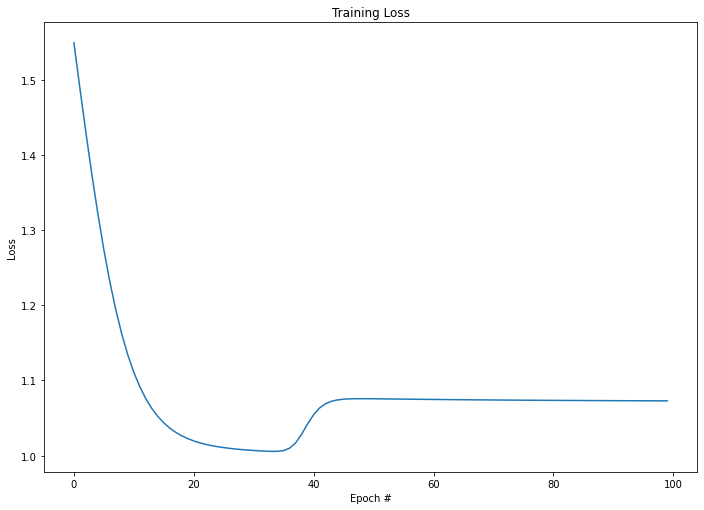

In [13]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

2. Learning rate = 0.005

Train our model

In [14]:
learning_rate=0.005
losses = []
W=train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=1.0728443
Epoch=5, loss=1.0728186
Epoch=10, loss=1.0727874
Epoch=15, loss=1.0727573
Epoch=20, loss=1.0727281
Epoch=25, loss=1.0726998
Epoch=30, loss=1.0726725
Epoch=35, loss=1.0726460
Epoch=40, loss=1.0726204
Epoch=45, loss=1.0725956
Epoch=50, loss=1.0725716
Epoch=55, loss=1.0725484
Epoch=60, loss=1.0725259
Epoch=65, loss=1.0725041
Epoch=70, loss=1.0724830
Epoch=75, loss=1.0724625
Epoch=80, loss=1.0724427
Epoch=85, loss=1.0724234
Epoch=90, loss=1.0724048
Epoch=95, loss=1.0723868
Epoch=100, loss=1.0723693


Evaluate result

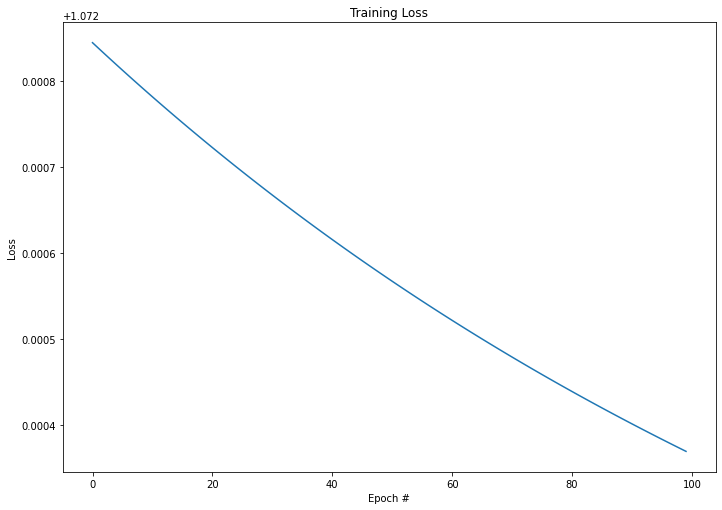

In [15]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

**Observations**

The losses of the 3 learning rates 0.01, 0.02 and 0.005 are completely different.

-- Learning rate = 0.01:

- The curve *drops dramatically*, starting very high and then quickly dropping to nearly 0. But after that, it remains stable. 

    **-->** The loss converges to 0 too *fast* and it needs only a few epochs.

-- Learning rate = 0.02:

- The loss decreases quickly, but then it increases a little but and remains stable. 

    **-->** It drops *slower* and *fails to converge*.

-- Learning rate = 0.005:

- The loss decreases *steadily* and the slope of the curve is *more gentle*.

    **-->** The loss looks like it's *nearly linear* and takes *more epochs to converge*.